#  import module

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#  Import data

In [3]:
df = pd.read_excel("rice.xlsx")
#df = pd.read_excel("Path to rice.xlsx ")
X = df.drop(columns=['Class'])
y = df['Class']
print(df.head(5))

    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0        15617  0.572896  Cammeo  
1        15072  0.615436  Cammeo  
2        14954  0.693259  Cammeo  
3        13368  0.640669  Cammeo  
4        15262  0.646024  Cammeo  


#  Choose best parameter

In [4]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=20)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)

parameters = {
    'n_neighbors': [13, 14, 15, 16, 17, 18],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'metric': ['minkowski']
}
# GridSearchCV
# grid = GridSearchCV(KNeighborsClassifier(n_jobs=-1), parameters, cv=skf, scoring='accuracy', verbose=1)
# grid.fit(X_train, y_train)
# grid.fit(X_train, y_train)
# best_model = grid.best_estimator_
# print("✅ Best Parameters:", grid.best_params_)
# print("✅ Best Cross-Validation Accuracy:", grid.best_score_)



# RandomizedSearchCV
knn= KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_distributions=parameters, n_iter=10000,
                                   cv=skf, scoring='accuracy', verbose=1, random_state=10)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)
print("✅ Best Cross-Validation Accuracy:", random_search.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 288 is smaller than n_iter=10000. Running 288 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 288 candidates, totalling 2880 fits
✅ Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 16, 'metric': 'minkowski', 'leaf_size': 20, 'algorithm': 'auto'}
✅ Best Cross-Validation Accuracy: 0.9251855047454702


#  Predict data and show results

In [5]:
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("\n🎯 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))




🎯 Test Accuracy: 0.9291338582677166

📋 Classification Report:
               precision    recall  f1-score   support

      Cammeo       0.92      0.92      0.92       336
    Osmancik       0.94      0.94      0.94       426

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



#  Confusion matrix

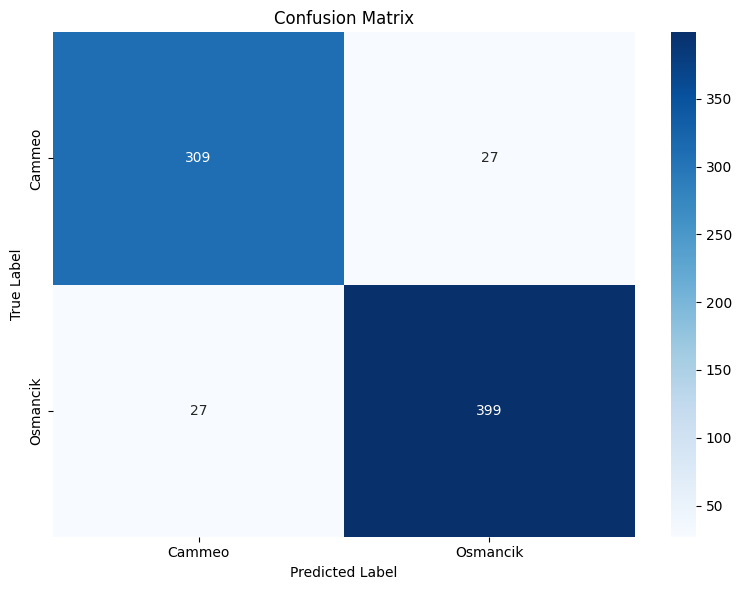

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



#  Calculate metric accuracy

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fdr = fp / (tp + fp)
fnr = fn / (fn + tp)
print(f"\n Accuracy     : {accuracy:.4f}")
print(f" Sensitivity  : {sensitivity:.4f}")
print(f" Specificity  : {specificity:.4f}")
print(f" Precision    : {precision:.4f}")
print(f" F1 Score     : {f1:.4f}")
print(f" NPV          : {npv:.4f}")
print(f" FPR          : {fpr:.4f}")
print(f" FDR          : {fdr:.4f}")
print(f" FNR          : {fnr:.4f}")



 Accuracy     : 0.9291
 Sensitivity  : 0.9366
 Specificity  : 0.9196
 Precision    : 0.9366
 F1 Score     : 0.9366
 NPV          : 0.9196
 FPR          : 0.0804
 FDR          : 0.0634
 FNR          : 0.0634


#  Table of accuarcy with different values of k

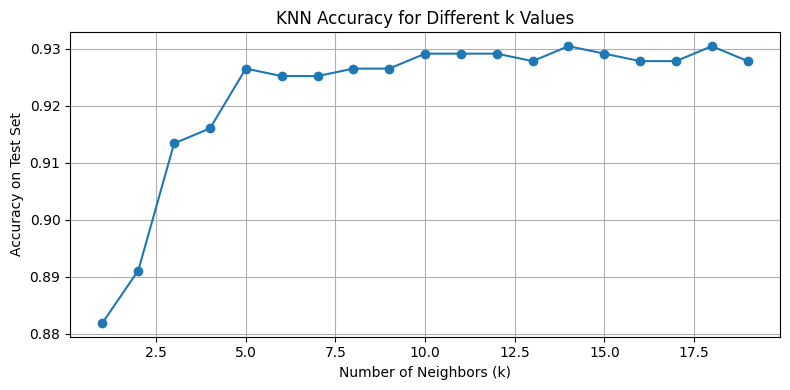

In [13]:
accuracies = []
k_range = range(1,20)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.title("KNN Accuracy for Different k Values")
plt.grid(True)
plt.tight_layout()
plt.show()